In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data set 
df = pd.read_csv('IceCreamData (1).csv')
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [3]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [4]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# As we are using Decision tree algorithm, we dont need feature scaling as it is not sensitive to variance in data

In [5]:
#Seperating the data in the form of dependent and independent variables
X = df.iloc[:,:1].values
Y = df.iloc[:,1].values

In [10]:
#Splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
X_train

array([[13.62450892],
       [11.56964367],
       [16.95477783],
       [17.04973761],
       [28.78743552],
       [32.47979434],
       [27.70505923],
       [23.42464718],
       [14.6859445 ],
       [27.52923218],
       [ 6.35245937],
       [ 7.22337716],
       [34.86070051],
       [28.86558895],
       [26.12213765],
       [23.57711325],
       [26.18796989],
       [22.17119887],
       [35.33120818],
       [35.4581362 ],
       [29.18504465],
       [14.3840835 ],
       [ 7.10749101],
       [27.37540101],
       [16.19129752],
       [15.02911176],
       [11.07784312],
       [18.77353222],
       [17.99302022],
       [ 9.07383825],
       [24.62861149],
       [20.05018591],
       [26.12624136],
       [19.05928653],
       [18.88371892],
       [22.24873896],
       [14.37969698],
       [22.94031709],
       [18.81182403],
       [36.99708394],
       [13.36431317],
       [23.41086133],
       [28.95773632],
       [25.72547019],
       [28.2717647 ],
       [23

In [7]:
from sklearn.tree import DecisionTreeRegressor
Reg = DecisionTreeRegressor(random_state = 1)
Reg.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=1)

In [8]:
y_predict = Reg.predict(X_test)
from sklearn import metrics
r_square = metrics.r2_score(Y_test,y_predict)
print(f'R Squared error is {r_square}')

R Squared error is 0.9650101683012701


As the r2 is close to 1 we can say the model is a good fit for prediction

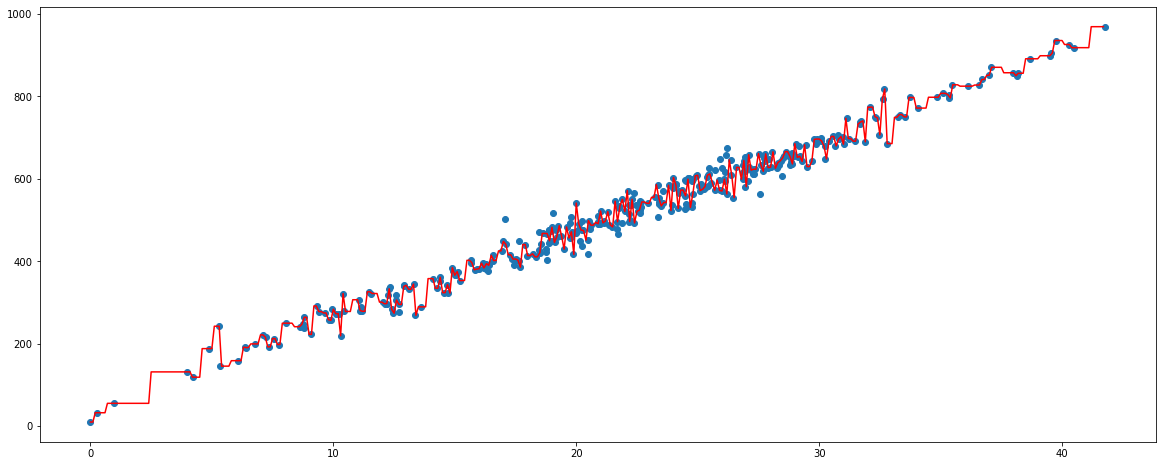

In [9]:
x_val = np.arange(min(X_train),max(X_train),0.1)
x_val = x_val.reshape(len(x_val),1)
plt.figure(figsize = (20,8))
plt.scatter(X_train,Y_train)
plt.plot(x_val,Reg.predict(x_val),color = 'red')
plt.show()

'''This is how a regression plot looks like in a decision tree regressor. 
Here we can see a lot of vertical straight line as the decision tree
algorithm takes the average at that particular place.'''

In [91]:
# from sklearn.tree import export_graphviz
Revenue = Reg.predict([[15]])
print(f'Predicted Revenue is {Revenue}')

Predicted Revenue is [366.2477143]
